In [1]:

pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
file_path = r"C:\Users\user\cubesat\test_ground_truth.csv"  # Faylın tam yolunu qeyd et
df = pd.read_csv(file_path)
print(df.head())


          IMG_NUM         X         Y         Z        ROLL      PITCH  \
0  img_000000.jpg -0.412343  0.093616  1.471104  -41.183486 -72.753825   
1  img_000013.jpg -0.284057  0.211241  1.626219  -23.450322 -52.040277   
2  img_000021.jpg -0.088085 -0.064699  1.320739 -166.798894 -45.783100   
3  img_000025.jpg -0.176943  0.123683  0.813856  171.952290  35.678803   
4  img_000026.jpg -0.106938  0.017386  0.973169  -13.543086   1.228194   

          YAW        Q1        Q2        Q3         W  
0  -97.527936  0.604168  0.153024  0.704276 -0.339942  
1   14.364103  0.127485  0.448995 -0.021556 -0.884131  
2 -100.788452  0.617850 -0.676561  0.327923  0.230201  
3   46.364376  0.864439  0.393566 -0.254625  0.181704  
4  -65.986592  0.093095 -0.073130  0.539651 -0.833524  


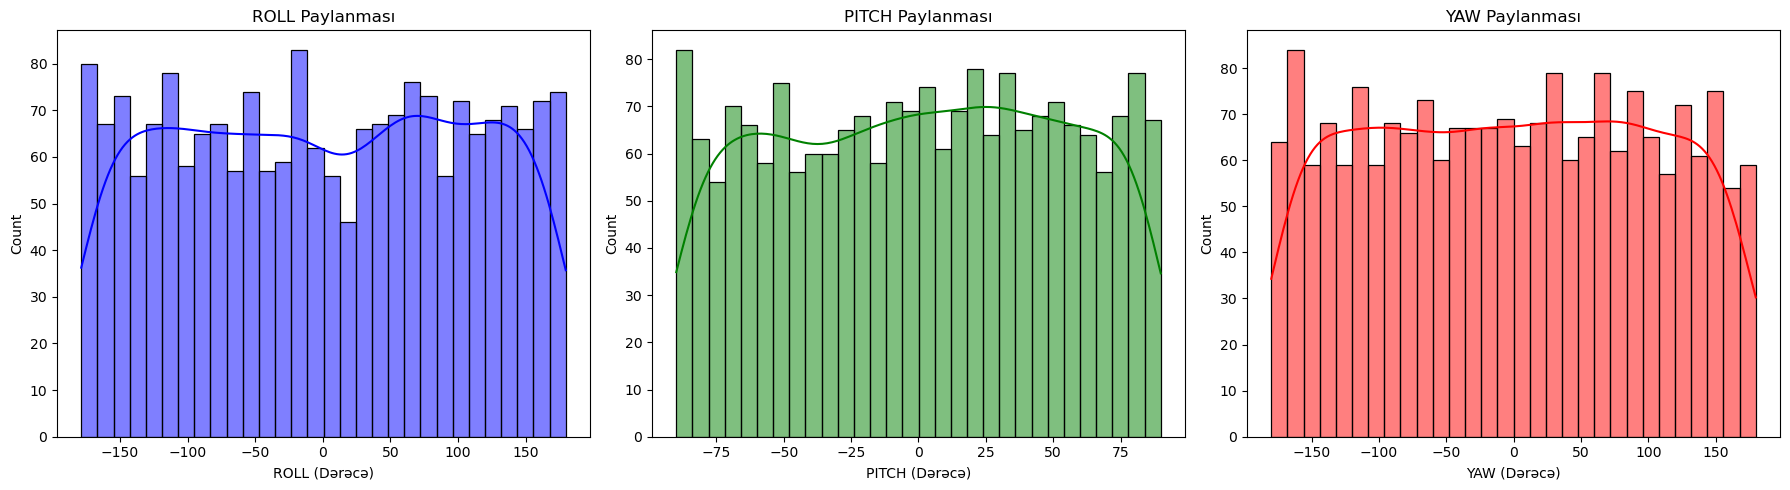

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["ROLL"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_xlabel("ROLL (Dərəcə)")
axes[0].set_title("ROLL Paylanması")

sns.histplot(df["PITCH"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_xlabel("PITCH (Dərəcə)")
axes[1].set_title("PITCH Paylanması")

sns.histplot(df["YAW"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_xlabel("YAW (Dərəcə)")
axes[2].set_title("YAW Paylanması")

plt.tight_layout()
plt.show()


In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
file_path = r"C:\Users\user\cubesat\test_ground_truth.csv"  
df = pd.read_csv(file_path)
print(df.head())


          IMG_NUM         X         Y         Z        ROLL      PITCH  \
0  img_000000.jpg -0.412343  0.093616  1.471104  -41.183486 -72.753825   
1  img_000013.jpg -0.284057  0.211241  1.626219  -23.450322 -52.040277   
2  img_000021.jpg -0.088085 -0.064699  1.320739 -166.798894 -45.783100   
3  img_000025.jpg -0.176943  0.123683  0.813856  171.952290  35.678803   
4  img_000026.jpg -0.106938  0.017386  0.973169  -13.543086   1.228194   

          YAW        Q1        Q2        Q3         W  
0  -97.527936  0.604168  0.153024  0.704276 -0.339942  
1   14.364103  0.127485  0.448995 -0.021556 -0.884131  
2 -100.788452  0.617850 -0.676561  0.327923  0.230201  
3   46.364376  0.864439  0.393566 -0.254625  0.181704  
4  -65.986592  0.093095 -0.073130  0.539651 -0.833524  


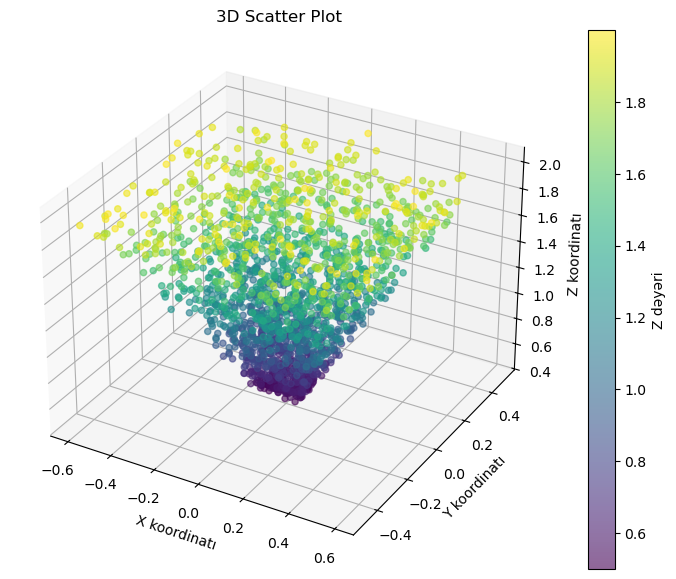

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(df["X"], df["Y"], df["Z"], c=df["Z"], cmap="viridis", alpha=0.6)
ax.set_xlabel("X koordinatı")
ax.set_ylabel("Y koordinatı")
ax.set_zlabel("Z koordinatı")
ax.set_title("3D Scatter Plot")
plt.colorbar(sc, ax=ax, label="Z dəyəri")
plt.show()


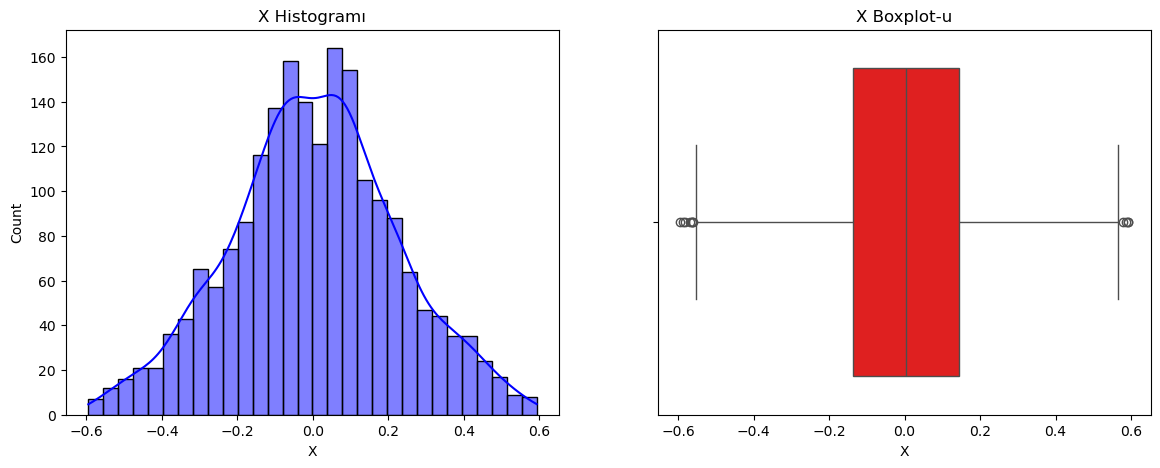

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
column = "X"  

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"{column} Histogramı")
sns.boxplot(x=df[column], ax=axes[1], color="red")
axes[1].set_title(f"{column} Boxplot-u")

plt.show()


In [17]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
column = "X"
outliers = detect_outliers_iqr(df, column)
print(f"{column} sütununda aşkar olunan outlier-lər:")
print(outliers)


X sütununda aşkar olunan outlier-lər:
             IMG_NUM         X         Y         Z        ROLL      PITCH  \
106   img_000513.jpg  0.587527  0.159326  1.969568 -126.322153 -86.270721   
720   img_003549.jpg -0.583450  0.258022  1.948539  -56.755166  89.597996   
781   img_003876.jpg  0.593207  0.060101  1.993240   39.908528  77.982264   
1016  img_005041.jpg -0.595134  0.138265  1.979057 -158.852892  65.372693   
1202  img_005999.jpg -0.563974  0.177261  1.896856  163.482147  32.509091   
1208  img_006021.jpg -0.561957 -0.483131  1.967260  138.822415 -64.561542   
1262  img_006241.jpg  0.579270 -0.338872  1.967825  116.409884   2.953936   
1416  img_007033.jpg -0.570085  0.323690  1.943117   65.745395  87.963240   
1619  img_008071.jpg  0.590789 -0.117613  1.979435  -43.981211 -79.797796   
1787  img_008987.jpg -0.586676 -0.144291  1.924128    2.727970 -51.958634   
1854  img_009302.jpg -0.564757  0.154967  1.922030    3.831923  48.281608   

             YAW        Q1        Q2 

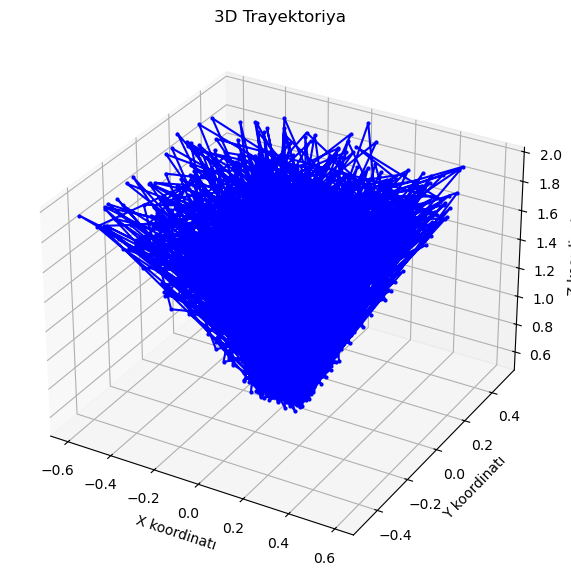

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot(df["X"], df["Y"], df["Z"], color="blue", marker="o", markersize=2, linestyle="-")
ax.set_xlabel("X koordinatı")
ax.set_ylabel("Y koordinatı")
ax.set_zlabel("Z koordinatı")
ax.set_title("3D Trayektoriya")

plt.show()


In [7]:
import pandas as pd

file_path = "test_ground_truth.csv"  
df = pd.read_csv(file_path)

print(df.head()) 


          IMG_NUM         X         Y         Z        ROLL      PITCH  \
0  img_000000.jpg -0.412343  0.093616  1.471104  -41.183486 -72.753825   
1  img_000013.jpg -0.284057  0.211241  1.626219  -23.450322 -52.040277   
2  img_000021.jpg -0.088085 -0.064699  1.320739 -166.798894 -45.783100   
3  img_000025.jpg -0.176943  0.123683  0.813856  171.952290  35.678803   
4  img_000026.jpg -0.106938  0.017386  0.973169  -13.543086   1.228194   

          YAW        Q1        Q2        Q3         W  
0  -97.527936  0.604168  0.153024  0.704276 -0.339942  
1   14.364103  0.127485  0.448995 -0.021556 -0.884131  
2 -100.788452  0.617850 -0.676561  0.327923  0.230201  
3   46.364376  0.864439  0.393566 -0.254625  0.181704  
4  -65.986592  0.093095 -0.073130  0.539651 -0.833524  


In [13]:
from sklearn.decomposition import PCA


In [15]:
features = ["X", "Y", "Z", "ROLL", "PITCH", "YAW", "Q1", "Q2", "Q3", "W"]
X_pca = df[features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
explained_variance = pca.explained_variance_ratio_


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns  


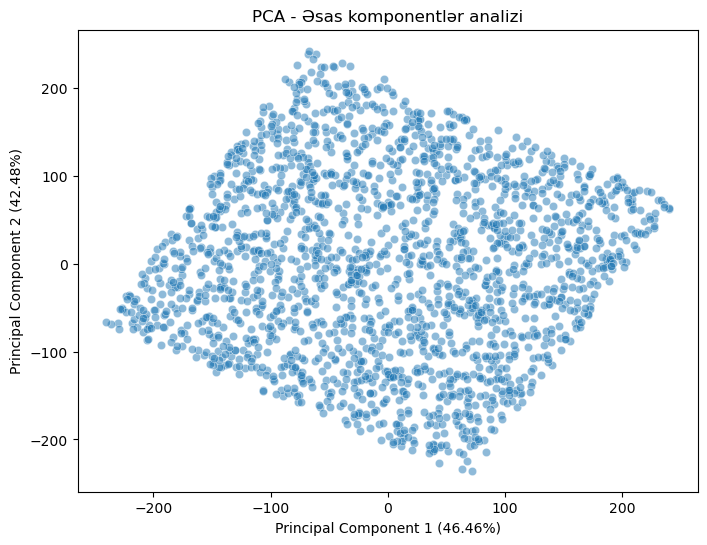

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], alpha=0.5)
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}%)")
plt.title("PCA - Əsas komponentlər analizi")
plt.show()


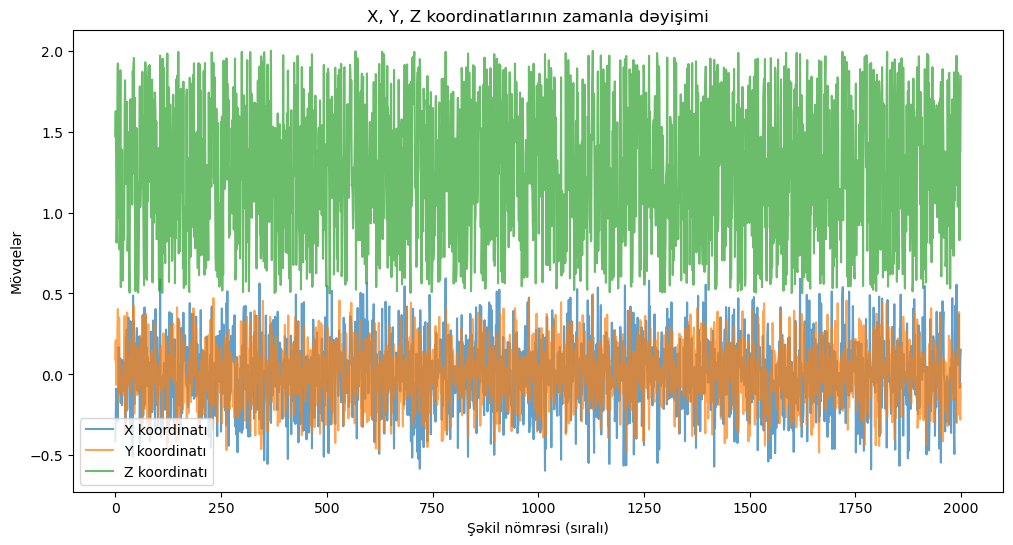

In [23]:
df_sorted = df.sort_values(by="IMG_NUM")
plt.figure(figsize=(12, 6))
plt.plot(df_sorted.index, df_sorted["X"], label="X koordinatı", alpha=0.7)
plt.plot(df_sorted.index, df_sorted["Y"], label="Y koordinatı", alpha=0.7)
plt.plot(df_sorted.index, df_sorted["Z"], label="Z koordinatı", alpha=0.7)
plt.xlabel("Şəkil nömrəsi (sıralı)")
plt.ylabel("Mövqelər")
plt.title("X, Y, Z koordinatlarının zamanla dəyişimi")
plt.legend()
plt.show()


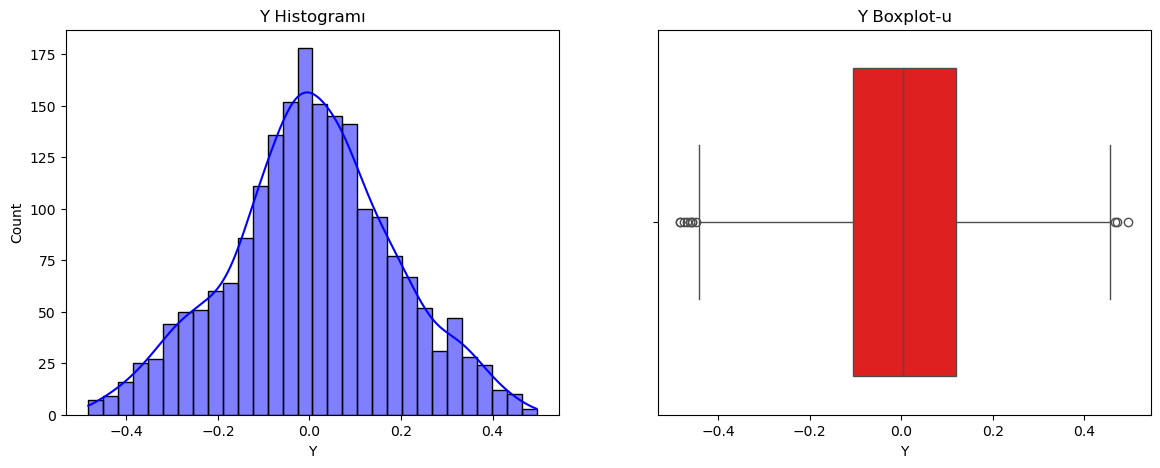

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
column = "Y"  

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"{column} Histogramı")
sns.boxplot(x=df[column], ax=axes[1], color="red")
axes[1].set_title(f"{column} Boxplot-u")

plt.show()

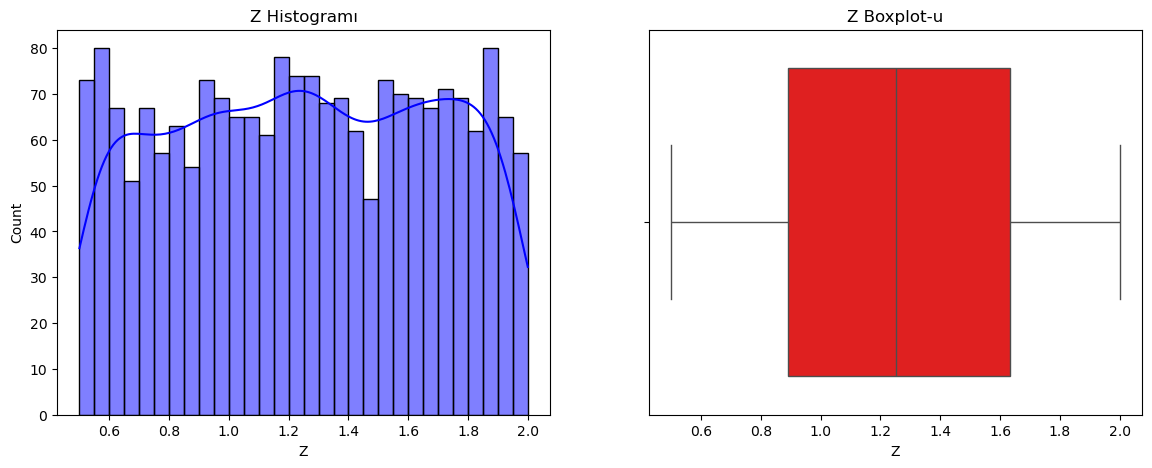

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
column = "Z"  

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"{column} Histogramı")
sns.boxplot(x=df[column], ax=axes[1], color="red")
axes[1].set_title(f"{column} Boxplot-u")

plt.show()

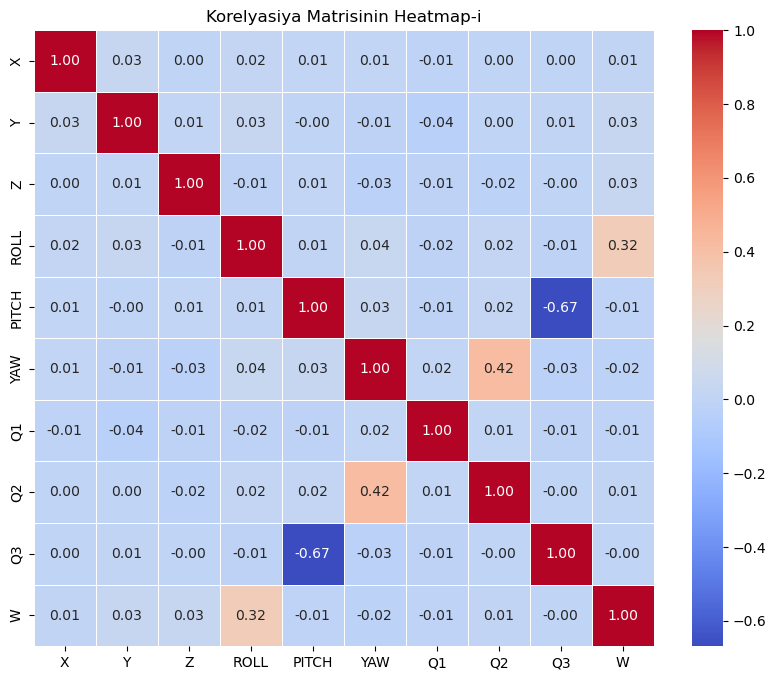

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelyasiya Matrisinin Heatmap-i")
plt.show()
